In [3]:
import pandas as pd

# 1.) Clean the Apple Data to get a quarterly series of EPS.

In [4]:
file_path = r"C:\Users\blaman\Desktop\mqe\ml lab\AAPL_quarterly_financials.csv"

# Read the CSV file
y = pd.read_csv(file_path)

In [5]:
y.index = y.name

In [6]:
y = pd.DataFrame(y.loc["BasicEPS", :]).iloc[2:,:]

In [7]:
y.index = pd.to_datetime(y.index)

In [8]:
# CHECK IF NAS ARE NO DIVIDEND PERIOD
y = y.sort_index().fillna(0.)

# 2.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data

In [12]:
from pytrends.request import TrendReq

In [21]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ['iPhone', 'Recession','Samsung','Interest Rates','New Phone','Buy iPhone','Sell iPhone','Taylor Swift Tickets','Hospital','UCLA']
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]
    

In [22]:
df

,iPhone,Recession,Samsung,Interest Rates,New Phone,Buy iPhone,Sell iPhone,Taylor Swift Tickets,Hospital,UCLA
date,,,,,,,,,,
2004-01-01,0,8,26,60,51,0,0,0,80,99
2004-02-01,0,7,23,58,48,0,0,0,78,79
2004-03-01,0,8,25,67,45,0,3,0,80,87
2004-04-01,0,10,23,71,49,0,2,0,72,98
2004-05-01,0,8,24,64,48,0,0,0,70,83
...,...,...,...,...,...,...,...,...,...,...
2023-09-01,66,24,56,75,90,45,42,23,84,40
2023-10-01,52,24,56,70,84,34,34,27,82,46
2023-11-01,49,22,59,70,76,33,30,35,80,45


In [23]:
df = df.resample("Q").mean()

In [30]:
# ALIGN DATA
temp = pd.concat([y, df],axis = 1).dropna()
y = temp[["BasicEPS"]].copy()
df = temp.iloc[:,1:].copy()

# 3.) Normalize all the X data

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler= StandardScaler()

In [33]:
X_scaled=scaler.fit_transform(df)

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [52]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

In [53]:
lasso=Lasso(alpha=.01)

In [54]:
lasso.fit(X_scaled,y)

Lasso(alpha=0.01)

In [55]:
coefficients=lasso.coef_

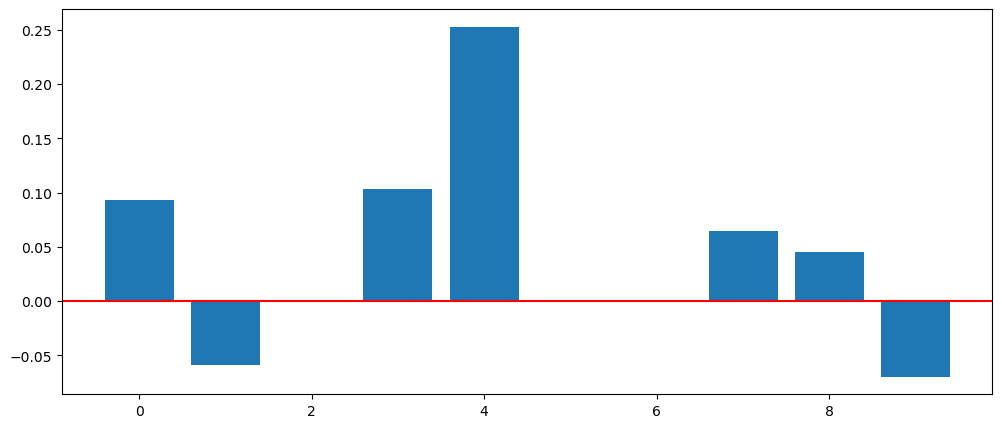

In [56]:

plt.figure(figsize = (12,5))
plt.bar(range(len(coefficients)), coefficients)
plt.axhline(0, color = "red")
plt.show()

# 5.) Do these coefficient magnitudes make sense?

yes, we can see  that the lasso makes some coefficients close to 0 and leave some coefficients to be a relative large number. So it make senese